<a href="https://colab.research.google.com/github/jiw3026/baseline_/blob/main/07_%ED%86%A0%ED%94%BD%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh
%cd ..

In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


# 뉴스 전처리

데이터 설명
- AI Hub(https://aihub.or.kr/) 에서 제공하는 문서요약텍스트 데이터 중 신문기사 train_original.json파일을 사용합니다. 
- AI가 텍스트를 이해하고 핵심내용을 자동으로 요약하는 기술개발을 위한 텍스트 및 요약내용을 생성하는 텍스트 데이터로, 그 중에서 신문기사 원문데이터를 사용하여 문서요약과 토픽모델링을 진행하겠습니다. 
  - media: 미디어 명
  - id : 문서 번호
  - article_original : 신문기사
  - abstractive : AI hub에서 제공하는 생성 요약문
  - extractive : 추출요약문, 원문의 형태적 구조를 바탕으로 내용을 잘 표현하는 문장 3개를 우선순위에 따라 차례로 작성


In [ ]:
# from google.colab import files
# data = files.upload()

In [ ]:
!pip install -U --no-cache-dir gdown --pre
!gdown --no-cookies --id 1KuBG40WNpVPV1ilfGaiCI2D3l8JVSfbS

In [ ]:
import pandas as pd

# df_news = pd.read_json("/content/train_original.json") # 절대경로
df_news = pd.read_json("./train_original.json") # 상대경로 : ./ = 나 자신(작업중인 파이썬 파일)과 같은 경로
df_news

,media,id,article_original,abstractive,extractive
0,부산일보,360972161,[지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작...,통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계...,"[4, 11, 18]"
1,중도일보,356659913,[서산시의회(의장 임재관) 가충순·이수의 의원이 (사)한국지역신문협회에서 수여하는 ...,서산시 가충순 의원과 이수의 의원이 활발한 의정활동을 펼친 감사의 표시로 한국지역신...,"[1, 3, 4]"
2,무등일보,351718460,[지난 2004년 시작해 조선대 학생들의 대표적인 행사로 자리매김한 ‘조선대 국토대...,‘조선대의 새로운 비상을 꿈꾸다’를 슬로건으로 진행되어 단체생활을 통해 협동심과 ...,"[0, 2, 4]"
3,이데일리,335868123,[서울시는 신학기가 시작되는 다음달 4일부터 고등학교 3학년 무상급식을 실시한다고 ...,서울시가 다음달 4일부터 서울 시내 319개 고등학교 3학년 8만4700명을 대상으...,"[0, 1, 2]"
4,서울신문,351443347,[미국인 선교사가 우간다에서 의사 행세를 하며 의료 시설을 운영한 혐의로 지역 시민...,미국인 선교사가 우간다에서 의사 행세를 하며 두 아이의 죽음과 관련돼 있다며 지역 ...,"[0, 1, 2]"
...,...,...,...,...,...
260692,매일경제,353316985,"[두통과 어지럼증은 우리에게 매우 익숙하다., 하루 이틀 정도만 참으면 자연스럽게 ...","두통과 어지럼증은 우리에게 매우 익숙한 증상이며, 이 두통은 크게 긴장성 두통, 혈...","[3, 12, 16]"
260693,부산일보,360784906,[파주 최대 테마파크 퍼스트가든이 ㈜투바앤의 캐릭터 '라바'와 할로윈 페스티벌(사진...,파주 최대 테마파크 퍼스트가든이 오는 10월 12일부터 31일까지 가족들이 함께 즐...,"[0, 4, 1]"
260694,부산일보,357253753,[민원과 난공사로 완공이 늦어지고 있는 양산시 한일아파트 인근 옹벽 보수·보강공사 ...,양산시는 지난해 10월부터 43억 원을 들여 진행 중인 한일아파트 뒤편 옹벽 보수·...,"[4, 6, 7]"
260695,매일신문,347655953,"[사단법인 전국자원봉사연맹이 호국보훈의 달을 맞이하여, 오는 2019년 6월 23일...","국가를 위해 헌신한 분들의 숭고한 희생을 기리고, 유가족 들을 위로하기 위해 열리는...","[0, 1, 2]"


In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260697 entries, 0 to 260696
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   media             260697 non-null  object
 1   id                260697 non-null  int64 
 2   article_original  260697 non-null  object
 3   abstractive       260697 non-null  object
 4   extractive        260697 non-null  object
dtypes: int64(1), object(4)
memory usage: 9.9+ MB


In [ ]:
# 원문기사 
sample_news = df_news['article_original'].iloc[0]

In [ ]:
sample_news[4], sample_news[11], sample_news[18]

("24일 통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 전년 대비 4.7%(1만 3286명) 증가한 29만 8820명으로 관련 통계를 작성한 1983년 이후 가장 많았으며, 5년 연속 증가세를 보였다.",
 '특히 폐렴(4위→3위)과 치매의 일종인 알츠하이머병(11위→9위)에 의한 사망률 순위 상승이 두드러졌다.',
 '지난해 자살에 의한 사망자는 1만 3670명으로 전년보다 9.7%(1207명) 증가했다.')

In [ ]:
# 생성 요약문(AI hub)
df_news['abstractive'].iloc[0]

"통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계를 작성한 이래 가장 많았으며 사망 원인 중 폐렴과 알츠하이머 병의 순위 상승이 두드러졌고 자살에 의한 사망자도 증가했다. "

In [ ]:
# 주요 문장 추출 결과(AI hub)
for i in df_news['extractive'].iloc[0]:
  print(df_news['article_original'].iloc[0][i])

24일 통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 전년 대비 4.7%(1만 3286명) 증가한 29만 8820명으로 관련 통계를 작성한 1983년 이후 가장 많았으며, 5년 연속 증가세를 보였다.
특히 폐렴(4위→3위)과 치매의 일종인 알츠하이머병(11위→9위)에 의한 사망률 순위 상승이 두드러졌다.
지난해 자살에 의한 사망자는 1만 3670명으로 전년보다 9.7%(1207명) 증가했다.


In [ ]:
# 데이터 타입과 null 값 확인
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260697 entries, 0 to 260696
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   media             260697 non-null  object
 1   id                260697 non-null  int64 
 2   article_original  260697 non-null  object
 3   abstractive       260697 non-null  object
 4   extractive        260697 non-null  object
dtypes: int64(1), object(4)
memory usage: 9.9+ MB


# 토픽모델링

한두개의 문서가 아니라 수천개의 경향성을 파악해야 한다면?

1. 토픽 모델이란?   
문서집합의 추상적인 "주제"를 발견하기 위한 통계적 모델 중 하나로, 텍스트 본문의 숨겨진 의미구조를 발견하기 위해 사용되는 텍스트 마이닝 기법 중 하나입니다.   
(https://ko.wikipedia.org/wiki/%ED%86%A0%ED%94%BD_%EB%AA%A8%EB%8D%B8)

2. 문헌 내에 어떤 주제가 들어있고, 주제 간의 비중이 어떤지는 문헌 집합 내의 단어 통계를 수학적으로 분석함으로써 알아 낼 수 있습니다.이러한 이유로 토픽 모델은 또한 확률적 토픽 모델이라고도 불립니다. 


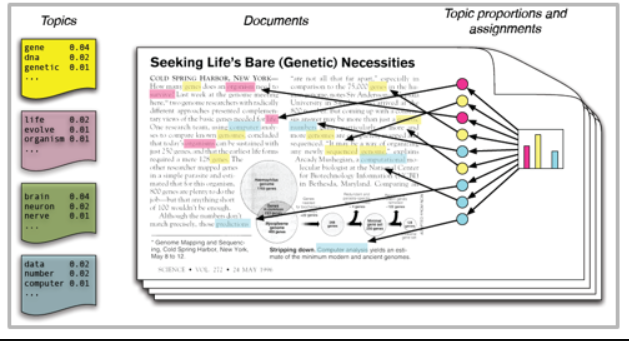

여러 토픽모델 알고리즘 중 LDA를 활용하여 실습해보겠습니다. 

LDA(Latent Dirichlet allocation, 잠재 디리클레 할당)란?    
- 자연어 처리에서 잠재 디리클레 할당(Latent Dirichlet allocation, LDA)은 주어진 문서에 대하여 각 문서에 어떤 주제들이 존재하는지를 서술하는 확률적 토픽 모델 기법 중 하나로, 
- 미리 알고 있는 주제별 단어수 분포를 바탕으로, 주어진 문서에서 발견된 단어수 분포를 분석함으로써 해당 문서가 어떤 주제들을 함께 다루고 있을지를 예측하는 모델입니다. 
(https://ko.wikipedia.org/wiki/%EC%9E%A0%EC%9E%AC_%EB%94%94%EB%A6%AC%ED%81%B4%EB%A0%88_%ED%95%A0%EB%8B%B9)

LDA 절차
0. 데이터 이해
1. 텍스트 전처리
2. TF-IDF 행렬 만들기
3. LDA 학습 및 결과분석

### 1. 텍스트 전처리(Text Preprocessing) 
- 텍스트를 자연어 처리를 위해 용도에 맞도록 사전에 표준화하는 작업입니다. 
- 텍스트 내 정보를 유지하고, 중복을 제거하여 분석 효율성을 높이기 위해 전처리를 수행합니다. 
- 토큰화, 품사 부착, 개체명 인식,원형복원, 불용어 처리 등이 있습니다. 

In [ ]:
# 한글, 영어, 숫자(소수와 퍼센트) 만 남기고 기타 특수문자들을 제거합니다. 
import re

def text_cleaning(doc):
  text = re.sub('[^가-힣ㄱ-ㅣa-zA-Z|0-9.%]', ' ', string = doc)
  return text

In [ ]:
# 원문은 각 문장이 나뉘어서 리스트에 포함되어 있습니다. 이를 한 문장으로 합치겠습니다. 
df_news['article_original'].iloc[0]

['지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작성 이후 가장 많았다.',
 '폐렴과 치매의 일종인 알츠하이머병은 지난해 사망원인 순위 3위와 9위로 전년보다 각각 한 단계, 두 단계 상승하는 등 노인성 질병에 의한 사망률이 급증하는 추세다.',
 '‘연령표준화 사망률’(표준인구 10만 명당 사망자 수)은 울산·충북·부산 순으로 높게 나타났다.',
 '■작년 사망자 29만 8820명, 역대 최다',
 "24일 통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 전년 대비 4.7%(1만 3286명) 증가한 29만 8820명으로 관련 통계를 작성한 1983년 이후 가장 많았으며, 5년 연속 증가세를 보였다.",
 '통계청은 인구 구조의 고령화와 지난해 1~2월 유례가 드문 한파 등을 그 원인으로 꼽았다.',
 '지난해 조사망률(인구 10만 명당 사망자 수) 역시 582.5명으로 전년보다 4.5%(25.1명) 증가해 5년 연속 늘었다.',
 '특히 80세 이상의 사망자가 전체 사망자의 절반에 가까운 46.3%로, 10년 전보다 14.3%포인트(P)나 증가했다.',
 '■폐렴·알츠하이머병 사망률 순위 ‘껑충’',
 '사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다.',
 '1983년 관련 통계를 집계한 이래 줄곧 암이 사망원인 1위로 집계됐다.',
 '특히 폐렴(4위→3위)과 치매의 일종인 알츠하이머병(11위→9위)에 의한 사망률 순위 상승이 두드러졌다.',
 '폐렴 사망률은 2004년 10위에서 꾸준히 순위가 상승하고 있고, 알츠하이머병 사망률 역시 통계 작성 이래 10대 사인에 처음 포함됐다.',
 '지난해 알츠하이머병에 의한 사망률은 12.0명으로 전년(9.8명) 대비 22.5% 증가했다.',
 '알츠하이머병 사망률은 10년 전(3.8명)과 비교하면 무려 214.2% 증가했다.',
 '폐렴 사망률은 45.4명으로 전년(

In [ ]:
# 원문
doc = ' '.join(df_news['article_original'].iloc[0])
doc

'지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작성 이후 가장 많았다. 폐렴과 치매의 일종인 알츠하이머병은 지난해 사망원인 순위 3위와 9위로 전년보다 각각 한 단계, 두 단계 상승하는 등 노인성 질병에 의한 사망률이 급증하는 추세다. ‘연령표준화 사망률’(표준인구 10만 명당 사망자 수)은 울산·충북·부산 순으로 높게 나타났다. ■작년 사망자 29만 8820명, 역대 최다 24일 통계청이 발표한 \'2018년 사망원인통계\'를 보면 지난해 총 사망자 수는 전년 대비 4.7%(1만 3286명) 증가한 29만 8820명으로 관련 통계를 작성한 1983년 이후 가장 많았으며, 5년 연속 증가세를 보였다. 통계청은 인구 구조의 고령화와 지난해 1~2월 유례가 드문 한파 등을 그 원인으로 꼽았다. 지난해 조사망률(인구 10만 명당 사망자 수) 역시 582.5명으로 전년보다 4.5%(25.1명) 증가해 5년 연속 늘었다. 특히 80세 이상의 사망자가 전체 사망자의 절반에 가까운 46.3%로, 10년 전보다 14.3%포인트(P)나 증가했다. ■폐렴·알츠하이머병 사망률 순위 ‘껑충’ 사망원인별로 보면 지난해 암(악성신생물)에 의한 사망률(이하 인구 10만 명당 사망자 수)은 154.3명으로 전년보다 0.2% 증가했다. 1983년 관련 통계를 집계한 이래 줄곧 암이 사망원인 1위로 집계됐다. 특히 폐렴(4위→3위)과 치매의 일종인 알츠하이머병(11위→9위)에 의한 사망률 순위 상승이 두드러졌다. 폐렴 사망률은 2004년 10위에서 꾸준히 순위가 상승하고 있고, 알츠하이머병 사망률 역시 통계 작성 이래 10대 사인에 처음 포함됐다. 지난해 알츠하이머병에 의한 사망률은 12.0명으로 전년(9.8명) 대비 22.5% 증가했다. 알츠하이머병 사망률은 10년 전(3.8명)과 비교하면 무려 214.2% 증가했다. 폐렴 사망률은 45.4명으로 전년(37.8명) 대비 20.0% 증가했다. 알코올 관련 사망률은 9.6명으로 전년보다 2.0% 늘었다. ■자살

In [ ]:
# 한글,영어, 숫자만 남은 문서입니다. 
clean_doc = text_cleaning(doc)
clean_doc

'지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작성 이후 가장 많았다. 폐렴과 치매의 일종인 알츠하이머병은 지난해 사망원인 순위 3위와 9위로 전년보다 각각 한 단계  두 단계 상승하는 등 노인성 질병에 의한 사망률이 급증하는 추세다.  연령표준화 사망률  표준인구 10만 명당 사망자 수 은 울산 충북 부산 순으로 높게 나타났다.  작년 사망자 29만 8820명  역대 최다 24일 통계청이 발표한  2018년 사망원인통계 를 보면 지난해 총 사망자 수는 전년 대비 4.7% 1만 3286명  증가한 29만 8820명으로 관련 통계를 작성한 1983년 이후 가장 많았으며  5년 연속 증가세를 보였다. 통계청은 인구 구조의 고령화와 지난해 1 2월 유례가 드문 한파 등을 그 원인으로 꼽았다. 지난해 조사망률 인구 10만 명당 사망자 수  역시 582.5명으로 전년보다 4.5% 25.1명  증가해 5년 연속 늘었다. 특히 80세 이상의 사망자가 전체 사망자의 절반에 가까운 46.3%로  10년 전보다 14.3%포인트 P 나 증가했다.  폐렴 알츠하이머병 사망률 순위  껑충  사망원인별로 보면 지난해 암 악성신생물 에 의한 사망률 이하 인구 10만 명당 사망자 수 은 154.3명으로 전년보다 0.2% 증가했다. 1983년 관련 통계를 집계한 이래 줄곧 암이 사망원인 1위로 집계됐다. 특히 폐렴 4위 3위 과 치매의 일종인 알츠하이머병 11위 9위 에 의한 사망률 순위 상승이 두드러졌다. 폐렴 사망률은 2004년 10위에서 꾸준히 순위가 상승하고 있고  알츠하이머병 사망률 역시 통계 작성 이래 10대 사인에 처음 포함됐다. 지난해 알츠하이머병에 의한 사망률은 12.0명으로 전년 9.8명  대비 22.5% 증가했다. 알츠하이머병 사망률은 10년 전 3.8명 과 비교하면 무려 214.2% 증가했다. 폐렴 사망률은 45.4명으로 전년 37.8명  대비 20.0% 증가했다. 알코올 관련 사망률은 9.6명으로 전년보다 2.0% 늘었다.  자살률 

- 품사 태깅 클래스 비교
https://konlpy.org/ko/latest/morph/

- KoNLPy에는 품사 태깅을 하기 위한 옵션이 여럿 있는데, 이들은 모두 문구(phrase)를 입력받아 태깅된 형태소를 출력하는 동일한 입출력 구조를 가집니다  

- 형태소 분석 이란 형태소를 비롯하여, 어근, 접두사/접미사, 품사(POS, part-of-speech) 등 다양한 언어적 속성의 구조를 파악하는 것입니다.
- 품사 태깅 은 형태소의 뜻과 문맥을 고려하여 그것에 마크업을 하는 일입니다. 

  예를 들어,   
  가방에 들어가신다 -> 가방/NNG + 에/JKM + 들어가/VV + 시/EPH + ㄴ다/EFN


konlpy와 mecab을 설치해봅시다. 
- Konlpy는 KoNLPy란 KoNLPy는 한국어 정보처리를 위한 파이썬 패키지 입니다. 자연어처리(NLP)에서 형태소를 분리(형태소 단위 토크나이징)하는 데이터 전처리가 필요한데 이때 한국어 데이터 전처리를 할 때 많이 사용하는 패키지입니다.

- MeCab은 품사 태깅 클래스 중 하나로 konlpy와 별도로 설치가 필요합니다. 

In [ ]:
# Mecab 토크나이저 객체 만들기
from konlpy.tag import Mecab

tokenizer = Mecab()

In [ ]:
# 텍스트 전처리
clean_doc =  text_cleaning(doc)
clean_doc

'지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작성 이후 가장 많았다. 폐렴과 치매의 일종인 알츠하이머병은 지난해 사망원인 순위 3위와 9위로 전년보다 각각 한 단계  두 단계 상승하는 등 노인성 질병에 의한 사망률이 급증하는 추세다.  연령표준화 사망률  표준인구 10만 명당 사망자 수 은 울산 충북 부산 순으로 높게 나타났다.  작년 사망자 29만 8820명  역대 최다 24일 통계청이 발표한  2018년 사망원인통계 를 보면 지난해 총 사망자 수는 전년 대비 4.7% 1만 3286명  증가한 29만 8820명으로 관련 통계를 작성한 1983년 이후 가장 많았으며  5년 연속 증가세를 보였다. 통계청은 인구 구조의 고령화와 지난해 1 2월 유례가 드문 한파 등을 그 원인으로 꼽았다. 지난해 조사망률 인구 10만 명당 사망자 수  역시 582.5명으로 전년보다 4.5% 25.1명  증가해 5년 연속 늘었다. 특히 80세 이상의 사망자가 전체 사망자의 절반에 가까운 46.3%로  10년 전보다 14.3%포인트 P 나 증가했다.  폐렴 알츠하이머병 사망률 순위  껑충  사망원인별로 보면 지난해 암 악성신생물 에 의한 사망률 이하 인구 10만 명당 사망자 수 은 154.3명으로 전년보다 0.2% 증가했다. 1983년 관련 통계를 집계한 이래 줄곧 암이 사망원인 1위로 집계됐다. 특히 폐렴 4위 3위 과 치매의 일종인 알츠하이머병 11위 9위 에 의한 사망률 순위 상승이 두드러졌다. 폐렴 사망률은 2004년 10위에서 꾸준히 순위가 상승하고 있고  알츠하이머병 사망률 역시 통계 작성 이래 10대 사인에 처음 포함됐다. 지난해 알츠하이머병에 의한 사망률은 12.0명으로 전년 9.8명  대비 22.5% 증가했다. 알츠하이머병 사망률은 10년 전 3.8명 과 비교하면 무려 214.2% 증가했다. 폐렴 사망률은 45.4명으로 전년 37.8명  대비 20.0% 증가했다. 알코올 관련 사망률은 9.6명으로 전년보다 2.0% 늘었다.  자살률 

In [ ]:
# 형태소 분리 
print(tokenizer.morphs(clean_doc))

['지난해', '고령화', '와', '유례', '가', '드문', '겨울', '한파', '등', '영향', '으로', '우리나라', '사망자', '수', '가', '통계', '작성', '이후', '가장', '많', '았', '다', '.', '폐렴', '과', '치매', '의', '일종', '인', '알츠하이머병', '은', '지난해', '사망', '원인', '순위', '3', '위', '와', '9', '위', '로', '전년', '보다', '각각', '한', '단계', '두', '단계', '상승', '하', '는', '등', '노인', '성', '질병', '에', '의한', '사망', '률', '이', '급증', '하', '는', '추세', '다', '.', '연령', '표준', '화', '사망률', '표준', '인구', '10', '만', '명', '당', '사망자', '수', '은', '울산', '충북', '부산', '순', '으로', '높', '게', '나타났', '다', '.', '작년', '사망자', '29', '만', '8820', '명', '역대', '최다', '24', '일', '통계청', '이', '발표', '한', '2018', '년', '사', '망원', '인', '통계', '를', '보', '면', '지난해', '총', '사망자', '수', '는', '전년', '대비', '4', '.', '7', '%', '1', '만', '3286', '명', '증가', '한', '29', '만', '8820', '명', '으로', '관련', '통계', '를', '작성', '한', '1983', '년', '이후', '가장', '많', '았', '으며', '5', '년', '연속', '증가세', '를', '보였', '다', '.', '통계청', '은', '인구', '구조', '의', '고령화', '와', '지난해', '1', '2', '월', '유례', '가', '드문', '한파', '등', '을', '그', '원인', '으로', '꼽', '았', '

In [ ]:
# 명사만 추출 
print(tokenizer.nouns(clean_doc))

['지난해', '고령화', '유례', '겨울', '한파', '등', '영향', '우리나라', '사망자', '수', '통계', '작성', '이후', '폐렴', '치매', '일종', '알츠하이머병', '지난해', '사망', '원인', '순위', '위', '위', '전년', '단계', '단계', '상승', '등', '노인', '질병', '사망', '급증', '추세', '연령', '표준', '사망률', '표준', '인구', '만', '명', '사망자', '수', '울산', '충북', '부산', '순', '작년', '사망자', '만', '명', '역대', '최다', '일', '통계청', '발표', '년', '사', '망원', '통계', '지난해', '사망자', '수', '전년', '대비', '만', '명', '증가', '만', '명', '관련', '통계', '작성', '년', '이후', '년', '연속', '증가세', '통계청', '인구', '구조', '고령화', '지난해', '월', '유례', '한파', '등', '원인', '지난해', '조사망', '인구', '만', '명', '사망자', '수', '명', '전년', '명', '증가', '년', '연속', '세', '이상', '사망자', '전체', '사망자', '절반', '년', '전', '포인트', '나', '증가', '폐렴', '알츠하이머병', '사망률', '순위', '사망', '원인', '지난해', '암', '악성', '생물', '사망률', '이하', '인구', '만', '명', '사망자', '수', '은', '명', '전년', '증가', '년', '관련', '통계', '집계', '이래', '암', '사망', '원인', '위', '집계', '폐렴', '위', '위', '과', '치매', '일종', '알츠하이머병', '위', '위', '사망률', '순위', '상승', '폐렴', '사망', '년', '위', '순위', '상승', '알츠하이머병', '사망', '통계', '작성', '이래', '대', '사인', '처음'

위 함수를 사용해도 되지만, 명사 이외에 품사를 사용하고 싶다면 아래처럼 품사 자체를 출력할 수도 있습니다. 

In [ ]:
# 품사 붙이기
token_tagged = tokenizer.pos(clean_doc)
token_tagged

[('지난해', 'NNG'),
 ('고령화', 'NNG'),
 ('와', 'JC'),
 ('유례', 'NNG'),
 ('가', 'JKS'),
 ('드문', 'VA+ETM'),
 ('겨울', 'NNG'),
 ('한파', 'NNG'),
 ('등', 'NNB'),
 ('영향', 'NNG'),
 ('으로', 'JKB'),
 ('우리나라', 'NNG'),
 ('사망자', 'NNG'),
 ('수', 'NNG'),
 ('가', 'JKS'),
 ('통계', 'NNG'),
 ('작성', 'NNG'),
 ('이후', 'NNG'),
 ('가장', 'MAG'),
 ('많', 'VA'),
 ('았', 'EP'),
 ('다', 'EF'),
 ('.', 'SF'),
 ('폐렴', 'NNG'),
 ('과', 'JC'),
 ('치매', 'NNG'),
 ('의', 'JKG'),
 ('일종', 'NNG'),
 ('인', 'VCP+ETM'),
 ('알츠하이머병', 'NNG'),
 ('은', 'JX'),
 ('지난해', 'NNG'),
 ('사망', 'NNG'),
 ('원인', 'NNG'),
 ('순위', 'NNG'),
 ('3', 'SN'),
 ('위', 'NNBC'),
 ('와', 'JC'),
 ('9', 'SN'),
 ('위', 'NNBC'),
 ('로', 'JKB'),
 ('전년', 'NNG'),
 ('보다', 'JKB'),
 ('각각', 'MAG'),
 ('한', 'MM'),
 ('단계', 'NNG'),
 ('두', 'MM'),
 ('단계', 'NNG'),
 ('상승', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETM'),
 ('등', 'NNB'),
 ('노인', 'NNG'),
 ('성', 'XSN'),
 ('질병', 'NNG'),
 ('에', 'JKB'),
 ('의한', 'VV+ETM'),
 ('사망', 'NNG'),
 ('률', 'XSN'),
 ('이', 'JKS'),
 ('급증', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETM'),
 ('추세', 'NNG

품사 정보를 활용해서 
1. 일반명사(NNG), 고유명사(NNP), 외국어(SL)만을 반환
2. 토큰화 이후 단어 길이가 2 이상인 명사만 남기겠습니다

In [ ]:
nouns = [s for s, t in token_tagged if t in ['SL', 'NNG', 'NNP'] and len(s) > 1]
print(nouns)

['지난해', '고령화', '유례', '겨울', '한파', '영향', '우리나라', '사망자', '통계', '작성', '이후', '폐렴', '치매', '일종', '알츠하이머병', '지난해', '사망', '원인', '순위', '전년', '단계', '단계', '상승', '노인', '질병', '사망', '급증', '추세', '연령', '표준', '사망률', '표준', '인구', '사망자', '울산', '충북', '부산', '작년', '사망자', '역대', '최다', '통계청', '발표', '망원', '통계', '지난해', '사망자', '전년', '대비', '증가', '관련', '통계', '작성', '이후', '연속', '증가세', '통계청', '인구', '구조', '고령화', '지난해', '유례', '한파', '원인', '지난해', '조사망', '인구', '사망자', '전년', '증가', '연속', '이상', '사망자', '전체', '사망자', '절반', '포인트', '증가', '폐렴', '알츠하이머병', '사망률', '순위', '사망', '원인', '지난해', '악성', '생물', '사망률', '이하', '인구', '사망자', '전년', '증가', '관련', '통계', '집계', '사망', '원인', '집계', '폐렴', '치매', '일종', '알츠하이머병', '사망률', '순위', '상승', '폐렴', '사망', '순위', '상승', '알츠하이머병', '사망', '통계', '작성', '사인', '처음', '포함', '지난해', '알츠하이머병', '사망률', '전년', '대비', '증가', '알츠하이머병', '사망', '비교', '증가', '폐렴', '사망', '전년', '대비', '증가', '알코올', '관련', '사망', '전년', '자살', '증가', '베르테르', '효과', '영향', '지난해', '자살', '사망자', '전년', '증가', '자살', '전년', '증가', '자살', '연속', '증가세', '자살', '사망', '원인', '순위', '차지'

In [ ]:
# 한 문장으로 합치기
' '.join(nouns)

'지난해 고령화 유례 겨울 한파 영향 우리나라 사망자 통계 작성 이후 폐렴 치매 일종 알츠하이머병 지난해 사망 원인 순위 전년 단계 단계 상승 노인 질병 사망 급증 추세 연령 표준 사망률 표준 인구 사망자 울산 충북 부산 작년 사망자 역대 최다 통계청 발표 망원 통계 지난해 사망자 전년 대비 증가 관련 통계 작성 이후 연속 증가세 통계청 인구 구조 고령화 지난해 유례 한파 원인 지난해 조사망 인구 사망자 전년 증가 연속 이상 사망자 전체 사망자 절반 포인트 증가 폐렴 알츠하이머병 사망률 순위 사망 원인 지난해 악성 생물 사망률 이하 인구 사망자 전년 증가 관련 통계 집계 사망 원인 집계 폐렴 치매 일종 알츠하이머병 사망률 순위 상승 폐렴 사망 순위 상승 알츠하이머병 사망 통계 작성 사인 처음 포함 지난해 알츠하이머병 사망률 전년 대비 증가 알츠하이머병 사망 비교 증가 폐렴 사망 전년 대비 증가 알코올 관련 사망 전년 자살 증가 베르테르 효과 영향 지난해 자살 사망자 전년 증가 자살 전년 증가 자살 연속 증가세 자살 사망 원인 순위 차지 기록 김진 통계청 인구 동향 과장 자살 베르테르 효과 유명 자살 영향 이후 유명 자살 자살 지난해 유명 자살 영향 설명 지역 연령 구조 차이 표준 사망률 표준 인구 사망자 울산 충북 부산 서울 경기 사인 연령 표준 사망 지역 경남 심장 질환 경남 뇌혈관 질환 울산 폐렴 경북 운수 사고 전남 고의 자해 자살 충남'

In [ ]:
# 토큰화 이후 단어 길이가 2 이상인 명사만 남기기 
# 일반명사(NNG), 고유명사(NNP), 외국어(SL)만을 반환
# 한국어의 경우 토큰화 과정에서 조사나 접속사 제거로 대부분의 불용어가제거 되지만 불필요한 명사나 형용사를 제거하고 싶은 경우 불용어 제거를 추가하면 됩니다. 

from konlpy.tag import Mecab
import numpy as np 

def text_preprocess(doc):
    tokenizer = Mecab()
    
    # 텍스트 전처리
    clean_doc =  text_cleaning(doc)
    
    # 품사 붙이기
    token_tagged = tokenizer.pos(clean_doc)

    # 명사추출
    token_nouns = [s for s, t in token_tagged if t in ['SL', 'NNG', 'NNP'] and len(s) > 1]

    # 한 문장으로 합치기 
    # 아래에서 활용할 TfidfVectorizer는 기본적으로 토큰화가 되어있지 않은 텍스트 데이터를 입력으로 사용하기 때문에 join 작업을 미리 해줍니다. 
    if token_nouns : 
        return ' '.join(token_nouns)
    else : 
        return np.nan


print('전처리 결과 확인 :')
text_preprocess(doc)

전처리 결과 확인 :


'지난해 고령화 유례 겨울 한파 영향 우리나라 사망자 통계 작성 이후 폐렴 치매 일종 알츠하이머병 지난해 사망 원인 순위 전년 단계 단계 상승 노인 질병 사망 급증 추세 연령 표준 사망률 표준 인구 사망자 울산 충북 부산 작년 사망자 역대 최다 통계청 발표 망원 통계 지난해 사망자 전년 대비 증가 관련 통계 작성 이후 연속 증가세 통계청 인구 구조 고령화 지난해 유례 한파 원인 지난해 조사망 인구 사망자 전년 증가 연속 이상 사망자 전체 사망자 절반 포인트 증가 폐렴 알츠하이머병 사망률 순위 사망 원인 지난해 악성 생물 사망률 이하 인구 사망자 전년 증가 관련 통계 집계 사망 원인 집계 폐렴 치매 일종 알츠하이머병 사망률 순위 상승 폐렴 사망 순위 상승 알츠하이머병 사망 통계 작성 사인 처음 포함 지난해 알츠하이머병 사망률 전년 대비 증가 알츠하이머병 사망 비교 증가 폐렴 사망 전년 대비 증가 알코올 관련 사망 전년 자살 증가 베르테르 효과 영향 지난해 자살 사망자 전년 증가 자살 전년 증가 자살 연속 증가세 자살 사망 원인 순위 차지 기록 김진 통계청 인구 동향 과장 자살 베르테르 효과 유명 자살 영향 이후 유명 자살 자살 지난해 유명 자살 영향 설명 지역 연령 구조 차이 표준 사망률 표준 인구 사망자 울산 충북 부산 서울 경기 사인 연령 표준 사망 지역 경남 심장 질환 경남 뇌혈관 질환 울산 폐렴 경북 운수 사고 전남 고의 자해 자살 충남'

실습을 위해 뉴스 개수를 10000개로 조절하겠습니다. 

In [ ]:
num_news = 10000
df_news = df_news.iloc[:num_news]
df_news

,media,id,article_original,abstractive,extractive
0,부산일보,360972161,[지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작...,통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계...,"[4, 11, 18]"
1,중도일보,356659913,[서산시의회(의장 임재관) 가충순·이수의 의원이 (사)한국지역신문협회에서 수여하는 ...,서산시 가충순 의원과 이수의 의원이 활발한 의정활동을 펼친 감사의 표시로 한국지역신...,"[1, 3, 4]"
2,무등일보,351718460,[지난 2004년 시작해 조선대 학생들의 대표적인 행사로 자리매김한 ‘조선대 국토대...,‘조선대의 새로운 비상을 꿈꾸다’를 슬로건으로 진행되어 단체생활을 통해 협동심과 ...,"[0, 2, 4]"
3,이데일리,335868123,[서울시는 신학기가 시작되는 다음달 4일부터 고등학교 3학년 무상급식을 실시한다고 ...,서울시가 다음달 4일부터 서울 시내 319개 고등학교 3학년 8만4700명을 대상으...,"[0, 1, 2]"
4,서울신문,351443347,[미국인 선교사가 우간다에서 의사 행세를 하며 의료 시설을 운영한 혐의로 지역 시민...,미국인 선교사가 우간다에서 의사 행세를 하며 두 아이의 죽음과 관련돼 있다며 지역 ...,"[0, 1, 2]"
...,...,...,...,...,...
9995,서울신문,346679684,[증권사 등 금융투자업자에 대한 영업규제가 자율성과 책임성을 높이는 방향으로 개편된...,27일 금융위원회는 금융투자업자에 대해 정보교류 차단장치 규제는 법령에서 필수 원칙...,"[0, 3, 1]"
9996,한국경제,342862059,"[배우 조유정이 거침없는 신예의 모습을 보여주고 있다., 조유정 소속사 굳피플은 2...",거침없는 신예의 모습을 보여주고 있는 조유정은 25일 'KBS 2TV 새 월화드라마...,"[0, 1, 2]"
9997,아주경제,368415085,['2019 한-아세안 스마트시티 페어'(Smart City Fair 2019)가 ...,2019 한-아세안 스마트시티 페어'(Smart City Fair 2019)가 25...,"[0, 1, 5]"
9998,부산일보,361299935,[시인이자 소설가인 이상(1910~1937)은 한국 문학에서 한 줄기를 차지하고 있...,권영민 서울대 명예교수가 한국 문학의 한 줄기를 차지하고 있는 시인이자 소설가인 이...,"[0, 17, 3]"


In [ ]:
# tqdm.pandas를 활용하면 pandas내 apply 작업의 진행상황을 확인할 수 있습니다. 
from tqdm import tqdm
tqdm.pandas() 

df_news['article_preprocessed']= df_news['article_original'].progress_apply(lambda x: text_preprocess(' '.join(x)))
df_news

100%|██████████| 10000/10000 [01:53<00:00, 88.29it/s]
<ipython-input-24-f22866cf8b90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news['article_preprocessed']= df_news['article_original'].progress_apply(lambda x: text_preprocess(' '.join(x)))


,media,id,article_original,abstractive,extractive,article_preprocessed
0,부산일보,360972161,[지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작...,통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계...,"[4, 11, 18]",지난해 고령화 유례 겨울 한파 영향 우리나라 사망자 통계 작성 이후 폐렴 치매 일종...
1,중도일보,356659913,[서산시의회(의장 임재관) 가충순·이수의 의원이 (사)한국지역신문협회에서 수여하는 ...,서산시 가충순 의원과 이수의 의원이 활발한 의정활동을 펼친 감사의 표시로 한국지역신...,"[1, 3, 4]",서산시 의회 의장 임재 가충 이수 의원 한국 지역 신문협회 수여 우수 대상 가충 의...
2,무등일보,351718460,[지난 2004년 시작해 조선대 학생들의 대표적인 행사로 자리매김한 ‘조선대 국토대...,‘조선대의 새로운 비상을 꿈꾸다’를 슬로건으로 진행되어 단체생활을 통해 협동심과 ...,"[0, 2, 4]",시작 조선대 학생 대표 행사 자리매김 조선대 국토 대장정 해단식 일정 마감 조선대 ...
3,이데일리,335868123,[서울시는 신학기가 시작되는 다음달 4일부터 고등학교 3학년 무상급식을 실시한다고 ...,서울시가 다음달 4일부터 서울 시내 319개 고등학교 3학년 8만4700명을 대상으...,"[0, 1, 2]",서울시 신학기 시작 다음 고등학교 학년 무상급식 실시 서울 시내 고등학교 학년 대상...
4,서울신문,351443347,[미국인 선교사가 우간다에서 의사 행세를 하며 의료 시설을 운영한 혐의로 지역 시민...,미국인 선교사가 우간다에서 의사 행세를 하며 두 아이의 죽음과 관련돼 있다며 지역 ...,"[0, 1, 2]",미국인 선교사 우간다 의사 행세 의료 시설 운영 혐의 지역 시민 단체 주민 고소 원...
...,...,...,...,...,...,...
9995,서울신문,346679684,[증권사 등 금융투자업자에 대한 영업규제가 자율성과 책임성을 높이는 방향으로 개편된...,27일 금융위원회는 금융투자업자에 대해 정보교류 차단장치 규제는 법령에서 필수 원칙...,"[0, 3, 1]",증권사 금융 투자 업자 영업 규제 자율 책임 방향 개편 정보 교류 차단 장치 차이 ...
9996,한국경제,342862059,"[배우 조유정이 거침없는 신예의 모습을 보여주고 있다., 조유정 소속사 굳피플은 2...",거침없는 신예의 모습을 보여주고 있는 조유정은 25일 'KBS 2TV 새 월화드라마...,"[0, 1, 2]",배우 조유정 신예 모습 조유정 소속 피플 KBS TV 월화드라마 노래 조유정 합류 ...
9997,아주경제,368415085,['2019 한-아세안 스마트시티 페어'(Smart City Fair 2019)가 ...,2019 한-아세안 스마트시티 페어'(Smart City Fair 2019)가 25...,"[0, 1, 5]",아세안 스마트 시티 페어 Smart City Fair 부산 벡스코 진행 이번 행사 ...
9998,부산일보,361299935,[시인이자 소설가인 이상(1910~1937)은 한국 문학에서 한 줄기를 차지하고 있...,권영민 서울대 명예교수가 한국 문학의 한 줄기를 차지하고 있는 시인이자 소설가인 이...,"[0, 17, 3]",시인 소설가 이상 한국 문학 줄기 차지 줄기 생김새 방향 연구자 도전 의지 좌절 권...


In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   media                 10000 non-null  object
 1   id                    10000 non-null  int64 
 2   article_original      10000 non-null  object
 3   abstractive           10000 non-null  object
 4   extractive            10000 non-null  object
 5   article_preprocessed  10000 non-null  object
dtypes: int64(1), object(5)
memory usage: 468.9+ KB


In [ ]:
# 전처리 완료된 데이터프레임을 피클파일로 저장
df_news.to_pickle('./news_tokenized.pickle')
df_news

,media,id,article_original,abstractive,extractive,article_preprocessed
0,부산일보,360972161,[지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작...,통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계...,"[4, 11, 18]",지난해 고령화 유례 겨울 한파 영향 우리나라 사망자 통계 작성 이후 폐렴 치매 일종...
1,중도일보,356659913,[서산시의회(의장 임재관) 가충순·이수의 의원이 (사)한국지역신문협회에서 수여하는 ...,서산시 가충순 의원과 이수의 의원이 활발한 의정활동을 펼친 감사의 표시로 한국지역신...,"[1, 3, 4]",서산시 의회 의장 임재 가충 이수 의원 한국 지역 신문협회 수여 우수 대상 가충 의...
2,무등일보,351718460,[지난 2004년 시작해 조선대 학생들의 대표적인 행사로 자리매김한 ‘조선대 국토대...,‘조선대의 새로운 비상을 꿈꾸다’를 슬로건으로 진행되어 단체생활을 통해 협동심과 ...,"[0, 2, 4]",시작 조선대 학생 대표 행사 자리매김 조선대 국토 대장정 해단식 일정 마감 조선대 ...
3,이데일리,335868123,[서울시는 신학기가 시작되는 다음달 4일부터 고등학교 3학년 무상급식을 실시한다고 ...,서울시가 다음달 4일부터 서울 시내 319개 고등학교 3학년 8만4700명을 대상으...,"[0, 1, 2]",서울시 신학기 시작 다음 고등학교 학년 무상급식 실시 서울 시내 고등학교 학년 대상...
4,서울신문,351443347,[미국인 선교사가 우간다에서 의사 행세를 하며 의료 시설을 운영한 혐의로 지역 시민...,미국인 선교사가 우간다에서 의사 행세를 하며 두 아이의 죽음과 관련돼 있다며 지역 ...,"[0, 1, 2]",미국인 선교사 우간다 의사 행세 의료 시설 운영 혐의 지역 시민 단체 주민 고소 원...
...,...,...,...,...,...,...
9995,서울신문,346679684,[증권사 등 금융투자업자에 대한 영업규제가 자율성과 책임성을 높이는 방향으로 개편된...,27일 금융위원회는 금융투자업자에 대해 정보교류 차단장치 규제는 법령에서 필수 원칙...,"[0, 3, 1]",증권사 금융 투자 업자 영업 규제 자율 책임 방향 개편 정보 교류 차단 장치 차이 ...
9996,한국경제,342862059,"[배우 조유정이 거침없는 신예의 모습을 보여주고 있다., 조유정 소속사 굳피플은 2...",거침없는 신예의 모습을 보여주고 있는 조유정은 25일 'KBS 2TV 새 월화드라마...,"[0, 1, 2]",배우 조유정 신예 모습 조유정 소속 피플 KBS TV 월화드라마 노래 조유정 합류 ...
9997,아주경제,368415085,['2019 한-아세안 스마트시티 페어'(Smart City Fair 2019)가 ...,2019 한-아세안 스마트시티 페어'(Smart City Fair 2019)가 25...,"[0, 1, 5]",아세안 스마트 시티 페어 Smart City Fair 부산 벡스코 진행 이번 행사 ...
9998,부산일보,361299935,[시인이자 소설가인 이상(1910~1937)은 한국 문학에서 한 줄기를 차지하고 있...,권영민 서울대 명예교수가 한국 문학의 한 줄기를 차지하고 있는 시인이자 소설가인 이...,"[0, 17, 3]",시인 소설가 이상 한국 문학 줄기 차지 줄기 생김새 방향 연구자 도전 의지 좌절 권...


In [ ]:
df_news = pd.read_pickle('./news_tokenized.pickle')
df_news

,media,id,article_original,abstractive,extractive,article_preprocessed
0,부산일보,360972161,[지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작...,통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계...,"[4, 11, 18]",지난해 고령화 유례 겨울 한파 영향 우리나라 사망자 통계 작성 이후 폐렴 치매 일종...
1,중도일보,356659913,[서산시의회(의장 임재관) 가충순·이수의 의원이 (사)한국지역신문협회에서 수여하는 ...,서산시 가충순 의원과 이수의 의원이 활발한 의정활동을 펼친 감사의 표시로 한국지역신...,"[1, 3, 4]",서산시 의회 의장 임재 가충 이수 의원 한국 지역 신문협회 수여 우수 대상 가충 의...
2,무등일보,351718460,[지난 2004년 시작해 조선대 학생들의 대표적인 행사로 자리매김한 ‘조선대 국토대...,‘조선대의 새로운 비상을 꿈꾸다’를 슬로건으로 진행되어 단체생활을 통해 협동심과 ...,"[0, 2, 4]",시작 조선대 학생 대표 행사 자리매김 조선대 국토 대장정 해단식 일정 마감 조선대 ...
3,이데일리,335868123,[서울시는 신학기가 시작되는 다음달 4일부터 고등학교 3학년 무상급식을 실시한다고 ...,서울시가 다음달 4일부터 서울 시내 319개 고등학교 3학년 8만4700명을 대상으...,"[0, 1, 2]",서울시 신학기 시작 다음 고등학교 학년 무상급식 실시 서울 시내 고등학교 학년 대상...
4,서울신문,351443347,[미국인 선교사가 우간다에서 의사 행세를 하며 의료 시설을 운영한 혐의로 지역 시민...,미국인 선교사가 우간다에서 의사 행세를 하며 두 아이의 죽음과 관련돼 있다며 지역 ...,"[0, 1, 2]",미국인 선교사 우간다 의사 행세 의료 시설 운영 혐의 지역 시민 단체 주민 고소 원...
...,...,...,...,...,...,...
9995,서울신문,346679684,[증권사 등 금융투자업자에 대한 영업규제가 자율성과 책임성을 높이는 방향으로 개편된...,27일 금융위원회는 금융투자업자에 대해 정보교류 차단장치 규제는 법령에서 필수 원칙...,"[0, 3, 1]",증권사 금융 투자 업자 영업 규제 자율 책임 방향 개편 정보 교류 차단 장치 차이 ...
9996,한국경제,342862059,"[배우 조유정이 거침없는 신예의 모습을 보여주고 있다., 조유정 소속사 굳피플은 2...",거침없는 신예의 모습을 보여주고 있는 조유정은 25일 'KBS 2TV 새 월화드라마...,"[0, 1, 2]",배우 조유정 신예 모습 조유정 소속 피플 KBS TV 월화드라마 노래 조유정 합류 ...
9997,아주경제,368415085,['2019 한-아세안 스마트시티 페어'(Smart City Fair 2019)가 ...,2019 한-아세안 스마트시티 페어'(Smart City Fair 2019)가 25...,"[0, 1, 5]",아세안 스마트 시티 페어 Smart City Fair 부산 벡스코 진행 이번 행사 ...
9998,부산일보,361299935,[시인이자 소설가인 이상(1910~1937)은 한국 문학에서 한 줄기를 차지하고 있...,권영민 서울대 명예교수가 한국 문학의 한 줄기를 차지하고 있는 시인이자 소설가인 이...,"[0, 17, 3]",시인 소설가 이상 한국 문학 줄기 차지 줄기 생김새 방향 연구자 도전 의지 좌절 권...


pickle파일로 저장하면 리스트가 그대로 살아 있는 것을 확인할 수 있습니다. 


In [ ]:
# 한 문장으로 join 해놓은 전처리 완료된 문장들을 공백 기준으로 분리하는 함수입니다. 

def my_tokenizer(text):
  return text.split()

In [ ]:
print(my_tokenizer(df_news['article_preprocessed'].iloc[0]))

['지난해', '고령화', '유례', '겨울', '한파', '영향', '우리나라', '사망자', '통계', '작성', '이후', '폐렴', '치매', '일종', '알츠하이머병', '지난해', '사망', '원인', '순위', '전년', '단계', '단계', '상승', '노인', '질병', '사망', '급증', '추세', '연령', '표준', '사망률', '표준', '인구', '사망자', '울산', '충북', '부산', '작년', '사망자', '역대', '최다', '통계청', '발표', '망원', '통계', '지난해', '사망자', '전년', '대비', '증가', '관련', '통계', '작성', '이후', '연속', '증가세', '통계청', '인구', '구조', '고령화', '지난해', '유례', '한파', '원인', '지난해', '조사망', '인구', '사망자', '전년', '증가', '연속', '이상', '사망자', '전체', '사망자', '절반', '포인트', '증가', '폐렴', '알츠하이머병', '사망률', '순위', '사망', '원인', '지난해', '악성', '생물', '사망률', '이하', '인구', '사망자', '전년', '증가', '관련', '통계', '집계', '사망', '원인', '집계', '폐렴', '치매', '일종', '알츠하이머병', '사망률', '순위', '상승', '폐렴', '사망', '순위', '상승', '알츠하이머병', '사망', '통계', '작성', '사인', '처음', '포함', '지난해', '알츠하이머병', '사망률', '전년', '대비', '증가', '알츠하이머병', '사망', '비교', '증가', '폐렴', '사망', '전년', '대비', '증가', '알코올', '관련', '사망', '전년', '자살', '증가', '베르테르', '효과', '영향', '지난해', '자살', '사망자', '전년', '증가', '자살', '전년', '증가', '자살', '연속', '증가세', '자살', '사망', '원인', '순위', '차지'

### 2. TF-IDF 행렬 만들기(TF-IDF(Term Frequency-Inverse Document Frequency)    
- 본격적인 자연어 처리를 위해서는 문자를 숫자로 수치화할 필요가 있습니다.  

- TF-IDF는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM(문서 단어 행렬(Document-Term Matrix)) 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법입니다.

- https://wikidocs.net/24559


In [ ]:
# sklearn을 통해서 TF-IDF 행렬을 만들어 줍니다. 
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# sklearn을 통해서 TF-IDF 행렬을 만들어 줍니다. 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(tokenizer=my_tokenizer) # split() 뿐
tfidf = tfidf_vect.fit_transform(raw_documents = df_news['article_preprocessed']) # 기사 개수는 1000개로 조절하겠습니다

tfidf

<260697x199862 sparse matrix of type '<class 'numpy.float64'>'
	with 26129689 stored elements in Compressed Sparse Row format>

### 3. LDA 학습   
토픽의 개수를 5으로 하여 LDA 모델을 학습시켜보도록 하겠습니다.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation?

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components = 5, 
                                max_iter = 20,
                                learning_method='online',
                                random_state=100)
lda_output = lda.fit_transform(tfidf)

In [ ]:
print('lda components:\n',lda.components_) 
print('shape:', lda.components_.shape) 

lda components:
 [[ 0.20010305  0.20015689  0.20004205 ...  0.20001791  0.20433103
   0.20003558]
 [16.39315952  7.47307038  1.18663042 ...  0.20013915  0.2000518
   0.77528171]
 [ 0.73065017  1.42369335  0.20119336 ...  1.40115011 42.31411924
   0.20001288]
 [ 0.20203033  0.20293658  0.2000232  ...  0.2000107   0.20124599
   0.2000201 ]
 [ 7.7947901   0.22940857  0.20020217 ...  0.2001143   0.20190531
   0.20000499]]
shape: (5, 199862)


LDA 과정에서 얻은 토픽들을 프린트해 봅시다. 토픽당 7개의 단어를 default로 설정하였습니다. 

In [ ]:
sample = list(range(10))
print(sample[:])
# print(sample[:-4:-1])

n = 1
print(sample[:-n-1:-1])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[9]


In [ ]:
terms = tfidf_vect.get_feature_names() # 단어 집합

def get_topics(components, feature_names, n=7):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda.components_,terms)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 1: [('대회', 1176.26), ('선수', 1111.45), ('경기', 725.02), ('리그', 588.13), ('시즌', 499.94), ('축구', 476.26), ('우승', 444.85)]
Topic 2: [('기업', 2918.77), ('기술', 1934.83), ('금융', 1788.54), ('투자', 1641.38), ('산업', 1571.77), ('시장', 1507.54), ('수출', 1365.81)]
Topic 3: [('공연', 886.24), ('방송', 853.07), ('제품', 681.25), ('작품', 647.33), ('영화', 623.03), ('브랜드', 593.22), ('축제', 586.04)]
Topic 4: [('대통령', 1321.59), ('의원', 1255.26), ('국회', 886.33), ('후보', 797.41), ('민주당', 790.52), ('일본', 731.97), ('장관', 695.93)]
Topic 5: [('사업', 4166.76), ('지역', 3926.84), ('교육', 2913.69), ('지원', 2910.56), ('도시', 2306.58), ('주민', 2129.76), ('시민', 2092.35)]


### 4. LDA 시각화

In [ ]:
# LDAvis 는 토픽 모델링에 자주 이용되는 Latent Dirichlet Allocation (LDA) 모델의 학습 결과를 시각적으로 표현하는 라이브러리입니다
!pip install pyLDAvis

In [ ]:
# LDA 시각화를 진행해봅시다. 
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne')
pyLDAvis.display(vis)


/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set '

LDAvis 는 두 가지 정보를 출력합니다. 첫째는 HTML 의 좌측에 출력되는 topic 의 2 차원 embedding vector 입니다. 비슷한 위치에 존재하는 토픽들은 서로 비슷한 문맥을 지니고 있습니다. 그리고 둘째는 오른쪽에 출력되는 각 토픽의 키워드 입니다.

좌측의 원들은 각각의 20개의 토픽을 나타냅니다.   
각 원과의 거리는 각 토픽들이 서로 얼마나 다른지를 보여줍니다.만약 두 개의 원이 겹친다면, 이 두 개의 토픽은 유사한 토픽이라는 의미입니다.   
각 원을 클릭하면 우측에 해당 토픽에 관한 정보가 나타납니다. 

위의 예시에서 1번 토픽은 사업, 지역, 산업, 지원, 한국 등 가장 광범위한 키워드들을 포함하고 있습니다. 
1번토픽과 겹치는 부분이 거의 없고 거리가 먼 15번 토픽은 조광조, 영의정, 기묘사화 등 역사와 관련된 토픽을 가지고 있습니다. 반면 1번 토픽에 포함된 3번 토픽은 코스피, 거래와 관련한 키워드를 갖고 있습니다.   


LDAvis 에서는 두 관점의 중요도를 사람이 직접 정할 수 있도록 하였습니다.  우측상단에 
λ 라는 값이 있습니다. 이 값은 [0, 1] 사이에서 조절가능한 값입니다. 그리고 그 아래 키워드 랭킹은 다음의 점수로 계산됩니다. 
λ를 1 로 설정하면 토픽 별로 가장 자주 등장하는 단어들을 우선적으로 키워드로 선택한다는 의미이며, 
λ 를 0 에 가깝게 설정할수록 토픽 간에 차이가 많이 나는 단어를 선택한다는 의미입니다.
https://lovit.github.io/nlp/2018/09/27/pyldavis_lda/

In [ ]:
for i, topic_list in enumerate(lda[tfidf]):
    if i==5:
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

# N-gram 활용하여 토픽모델링

### 1. 데이터 로드

In [ ]:
!gdown https://drive.google.com/uc?id=1lLlGIq1EPJpGUFjXrXSlD3Cu0R-s9YSj

Downloading...
From: https://drive.google.com/uc?id=1lLlGIq1EPJpGUFjXrXSlD3Cu0R-s9YSj
To: /content/news_tokenized.pickle
100% 1.05G/1.05G [00:26<00:00, 39.7MB/s]


In [ ]:
df_news = pd.read_pickle('./news_tokenized.pickle')
df_news

,media,id,article_original,abstractive,extractive,article_preprocessed
0,부산일보,360972161,[지난해 고령화와 유례가 드문 겨울 한파 등 영향으로 우리나라 사망자 수가 통계 작...,통계청이 발표한 '2018년 사망원인통계'를 보면 지난해 총 사망자 수는 관련 통계...,"[4, 11, 18]",지난해 고령화 유례 겨울 한파 영향 우리나라 사망자 통계 작성 이후 폐렴 치매 일종...
1,중도일보,356659913,[서산시의회(의장 임재관) 가충순·이수의 의원이 (사)한국지역신문협회에서 수여하는 ...,서산시 가충순 의원과 이수의 의원이 활발한 의정활동을 펼친 감사의 표시로 한국지역신...,"[1, 3, 4]",서산시 의회 의장 임재 가충 이수 의원 한국 지역 신문협회 수여 우수 대상 가충 의...
2,무등일보,351718460,[지난 2004년 시작해 조선대 학생들의 대표적인 행사로 자리매김한 ‘조선대 국토대...,‘조선대의 새로운 비상을 꿈꾸다’를 슬로건으로 진행되어 단체생활을 통해 협동심과 ...,"[0, 2, 4]",시작 조선대 학생 대표 행사 자리매김 조선대 국토 대장정 해단식 일정 마감 조선대 ...
3,이데일리,335868123,[서울시는 신학기가 시작되는 다음달 4일부터 고등학교 3학년 무상급식을 실시한다고 ...,서울시가 다음달 4일부터 서울 시내 319개 고등학교 3학년 8만4700명을 대상으...,"[0, 1, 2]",서울시 신학기 시작 다음 고등학교 학년 무상급식 실시 서울 시내 고등학교 학년 대상...
4,서울신문,351443347,[미국인 선교사가 우간다에서 의사 행세를 하며 의료 시설을 운영한 혐의로 지역 시민...,미국인 선교사가 우간다에서 의사 행세를 하며 두 아이의 죽음과 관련돼 있다며 지역 ...,"[0, 1, 2]",미국인 선교사 우간다 의사 행세 의료 시설 운영 혐의 지역 시민 단체 주민 고소 원...
...,...,...,...,...,...,...
260692,매일경제,353316985,"[두통과 어지럼증은 우리에게 매우 익숙하다., 하루 이틀 정도만 참으면 자연스럽게 ...","두통과 어지럼증은 우리에게 매우 익숙한 증상이며, 이 두통은 크게 긴장성 두통, 혈...","[3, 12, 16]",두통 어지럼증 하루 이틀 정도 자연 증상 경우 신체 기관 중요 질환 전조 증상 간과...
260693,부산일보,360784906,[파주 최대 테마파크 퍼스트가든이 ㈜투바앤의 캐릭터 '라바'와 할로윈 페스티벌(사진...,파주 최대 테마파크 퍼스트가든이 오는 10월 12일부터 31일까지 가족들이 함께 즐...,"[0, 4, 1]",파주 최대 테마파크 퍼스트 가든 투바 캐릭터 라바 할로윈 페스티벌 사진 진행 이번 ...
260694,부산일보,357253753,[민원과 난공사로 완공이 늦어지고 있는 양산시 한일아파트 인근 옹벽 보수·보강공사 ...,양산시는 지난해 10월부터 43억 원을 들여 진행 중인 한일아파트 뒤편 옹벽 보수·...,"[4, 6, 7]",민원 난공사 완공 양산 아파트 인근 옹벽 보수 보강 공사 현장 경남 양산시 평산동 ...
260695,매일신문,347655953,"[사단법인 전국자원봉사연맹이 호국보훈의 달을 맞이하여, 오는 2019년 6월 23일...","국가를 위해 헌신한 분들의 숭고한 희생을 기리고, 유가족 들을 위로하기 위해 열리는...","[0, 1, 2]",사단 법인 전국 자원 봉사 연맹 호국 보훈 일요일 대구 두류 공원 야외 음악당 진행...


pickle파일로 저장하면 리스트가 그대로 살아 있는 것을 확인할 수 있습니다. 


### 2. 토큰화(N-gram 포함)

In [ ]:
# 한 문장으로 join 해놓은 전처리 완료된 문장들을 공백 기준으로 분리하는 함수입니다. 

def my_tokenizer(text):
  return text.split()

In [ ]:
my_tokenizer(df_news['article_preprocessed'].iloc[0][:100])

['지난해',
 '고령화',
 '유례',
 '겨울',
 '한파',
 '영향',
 '우리나라',
 '사망자',
 '통계',
 '작성',
 '이후',
 '폐렴',
 '치매',
 '일종',
 '알츠하이머병',
 '지난해',
 '사망',
 '원인',
 '순위',
 '전년',
 '단계',
 '단계',
 '상승',
 '노인',
 '질병',
 '사망',
 '급증',
 '추세',
 '연령',
 '표준']

In [ ]:
df_news['article_preprocessed'].iloc[0][:100]

'지난해 고령화 유례 겨울 한파 영향 우리나라 사망자 통계 작성 이후 폐렴 치매 일종 알츠하이머병 지난해 사망 원인 순위 전년 단계 단계 상승 노인 질병 사망 급증 추세 연령 표준 '

In [ ]:
def bigram_tokenizer(text):
    tokens = text.split()
    return [' '.join(tokens[i:i+2]) for i in range(len(tokens)-1)]

In [ ]:
bigram_tokenizer(df_news['article_preprocessed'].iloc[0][:100])

['지난해 고령화',
 '고령화 유례',
 '유례 겨울',
 '겨울 한파',
 '한파 영향',
 '영향 우리나라',
 '우리나라 사망자',
 '사망자 통계',
 '통계 작성',
 '작성 이후',
 '이후 폐렴',
 '폐렴 치매',
 '치매 일종',
 '일종 알츠하이머병',
 '알츠하이머병 지난해',
 '지난해 사망',
 '사망 원인',
 '원인 순위',
 '순위 전년',
 '전년 단계',
 '단계 단계',
 '단계 상승',
 '상승 노인',
 '노인 질병',
 '질병 사망',
 '사망 급증',
 '급증 추세',
 '추세 연령',
 '연령 표준']

### 3. TF-IDF 행렬 만들기(TF-IDF(Term Frequency-Inverse Document Frequency)    
- 본격적인 자연어 처리를 위해서는 문자를 숫자로 수치화할 필요가 있습니다.  

- TF-IDF는 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM(문서 단어 행렬(Document-Term Matrix)) 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법입니다.

- https://wikidocs.net/24559


In [ ]:
# sklearn을 통해서 TF-IDF 행렬을 만들어 줍니다. 
from sklearn.feature_extraction.text import TfidfVectorizer

TfidfVectorizer?

In [ ]:
tfidf_vect = TfidfVectorizer(tokenizer=bigram_tokenizer)
# tfidf_vect = TfidfVectorizer(tokenizer=my_tokenizer, ngram_range=(2, 2))
tfidf = tfidf_vect.fit_transform(raw_documents = df_news['article_preprocessed'].iloc[:1000]) # 기사 개수는 1000개로 조절하겠습니다

tfidf

<1000x126948 sparse matrix of type '<class 'numpy.float64'>'
	with 148008 stored elements in Compressed Sparse Row format>

### 4. LDA 학습   
토픽의 개수를 20으로 하여 LDA 모델을 학습시켜보도록 하겠습니다.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

LatentDirichletAllocation?

In [ ]:
lda = LatentDirichletAllocation(n_components =3, 
                                max_iter = 20,
                                learning_method='online',
                                random_state=100)
lda_output = lda.fit_transform(tfidf)

In [ ]:
print('lda components:\n',lda.components_) 
print('shape:', lda.components_.shape) 

lda components:
 [[0.33355157 0.33371011 0.33358537 ... 0.40240448 0.40564064 0.33366812]
 [0.37931463 0.333719   0.38587297 ... 0.33364743 0.33360701 0.41907899]
 [0.33357388 0.48797223 0.33357945 ... 0.33368862 0.33361756 0.33368246]]
shape: (3, 126948)


LDA 과정에서 얻은 토픽들을 프린트해 봅시다. 토픽당 7개의 단어를 default로 설정하였습니다. 

In [ ]:
terms = tfidf_vect.get_feature_names() # 단어 집합

def get_topics(components, feature_names, n=7):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(lda.components_,terms)

Topic 1: [('벤처 기업', 1.89), ('사회 경제', 1.87), ('주민 자치', 1.73), ('중소 벤처', 1.71), ('검찰 개혁', 1.65), ('금융 그룹', 1.61), ('만세 운동', 1.57)]
Topic 2: [('도시 재생', 2.46), ('트럼프 대통령', 1.67), ('기술 개발', 1.52), ('사업 추진', 1.48), ('여론 조사', 1.46), ('영업 이익', 1.39), ('현지 시간', 1.37)]
Topic 3: [('스마트 시티', 2.08), ('가구 가구', 1.86), ('정상 회담', 1.81), ('과학 기술', 1.7), ('수출 규제', 1.68), ('거래 해당', 1.61), ('매도 호가', 1.61)]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### 5. LDA 시각화

In [ ]:
# LDAvis 는 토픽 모델링에 자주 이용되는 Latent Dirichlet Allocation (LDA) 모델의 학습 결과를 시각적으로 표현하는 라이브러리입니다
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# LDA 시각화를 진행해봅시다. 
import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, tfidf, tfidf_vect, mds='tsne')
pyLDAvis.display(vis)


/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set '